### Linear regression with custom linear regression model & dataset

In [1]:
import torch
import torch.nn as nn
import random
from tqdm import tqdm 

# Generate a numpy array as instances.
instances = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
# Multiply the instances by the weight to generate the Y's.
y = instances * 2

test_instances = torch.tensor([5], dtype=torch.float32)
 
n_samples, n_features = instances.shape

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self,  input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, instance):
        return self.linear(instance)
        
        
model = LinearRegression(input_size, output_size) # Custom linear regression model


# Number of iterations.
epochs = 100
learning_rate = 0.01

print(f"prediction before training: f(5) = {model(test_instances).item():.3f}")

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(epochs)):
    y_pred = model(instances)
    loss = loss_function(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [weight, b] = model.parameters()
        print(f"epoch {epoch}: w = {weight[0][0].item():.3f}, loss = {loss:.3f}")
    
print(f"prediction after training: f(5) = {model(test_instances).item():.3f}")

prediction before training: f(5) = 4.466


100%|██████████| 100/100 [00:01<00:00, 90.38it/s]

epoch 0: w = 0.864, loss = 7.462
epoch 10: w = 1.492, loss = 0.408
epoch 20: w = 1.602, loss = 0.213
epoch 30: w = 1.629, loss = 0.196
epoch 40: w = 1.643, loss = 0.185
epoch 50: w = 1.654, loss = 0.174
epoch 60: w = 1.664, loss = 0.164
epoch 70: w = 1.674, loss = 0.154
epoch 80: w = 1.684, loss = 0.145
epoch 90: w = 1.693, loss = 0.137
prediction after training: f(5) = 9.385


### Linear regression with sklearn dataset

100%|██████████| 100/100 [00:00<00:00, 8135.28it/s]

epoch: 0, loss = 10241.314
epoch: 10, loss = 8505.445
epoch: 20, loss = 7263.025
epoch: 30, loss = 6372.225
epoch: 40, loss = 5732.476
epoch: 50, loss = 5272.308
epoch: 60, loss = 4940.827
epoch: 70, loss = 4701.717
epoch: 80, loss = 4529.018
epoch: 90, loss = 4404.135


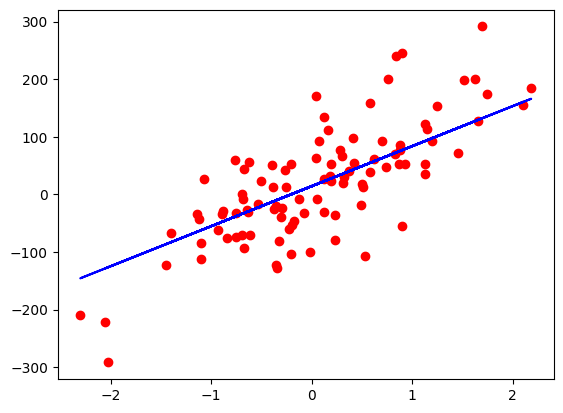

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm 

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=70, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = x.shape

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
epochs = 100

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(epochs)):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss = {loss.item():.3f}")
        
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

### Logestic regression

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm 


dataset = datasets.load_breast_cancer()

x, y = dataset.data, dataset.target

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1234)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

class LogesticRegression(nn.Module):
    def __init__(self,n_input_feature):
        super(LogesticRegression, self).__init__()
        self.linear = nn.Linear(n_input_feature, 1)
        
    def forward(self, x):
        y_pred  = torch.sigmoid(self.linear(x))
        
        return y_pred
    

model = LogesticRegression(n_features)


learning_rate = 0.01
epochs = 100

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss = {loss.item():.4f}")
        

with torch.no_grad():
    y_pred = model(x_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"accuracy : {acc * 100 :.2f}%")

epoch: 0, loss = 0.9197
epoch: 10, loss = 0.6674
epoch: 20, loss = 0.5268
epoch: 30, loss = 0.4415
epoch: 40, loss = 0.3849
epoch: 50, loss = 0.3445
epoch: 60, loss = 0.3142
epoch: 70, loss = 0.2905
epoch: 80, loss = 0.2714
epoch: 90, loss = 0.2556
accuracy : 90.64%
